In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    VotingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
import logging
import lightgbm as lgb

In [2]:
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

In [3]:
# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [4]:
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the dataset
df = pd.read_csv("C:/Users/keshaa2/OneDrive - Dell Technologies/MS/MLintro/German Bank/credit.csv")

In [6]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [7]:
# let's create a copy of the data
data = df.copy()

In [8]:
# Data Pre-processing
# Drop unnecessary columns
drop_columns = ['other_credit', 'job', 'years_at_residence', 'dependents', 'phone']
data = data.drop(drop_columns, axis=1)

In [9]:
# let's view the first 5 rows of the data
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,age,housing,existing_loans_count,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,67,own,2,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,22,own,1,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,49,own,1,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,45,other,1,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,53,other,2,yes


In [10]:
# Separate features and target variable
X = data.drop(columns=['default'])
y = data['default']

In [11]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   age                   1000 non-null   int64 
 9   housing               1000 non-null   object
 10  existing_loans_count  1000 non-null   int64 
 11  default               1000 non-null   object
dtypes: int64(5), object(7)
memory usage: 93.9+ KB


In [12]:
data.duplicated().sum()

0

In [13]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

checking_balance       0.000
months_loan_duration   0.000
credit_history         0.000
purpose                0.000
amount                 0.000
savings_balance        0.000
employment_duration    0.000
percent_of_income      0.000
age                    0.000
housing                0.000
existing_loans_count   0.000
default                0.000
dtype: float64

In [14]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.000,20.903,12.059,4.000,12.000,18.000,24.000,72.000
amount,1000.000,3271.258,2822.737,250.000,1365.500,2319.500,3972.250,18424.000
percent_of_income,1000.000,2.973,1.119,1.000,2.000,3.000,4.000,4.000
age,1000.000,35.546,11.375,19.000,27.000,33.000,42.000,75.000
existing_loans_count,1000.000,1.407,0.578,1.000,1.000,1.000,2.000,4.000


In [15]:
# One-hot encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first')  # drop first to avoid multicollinearity
encoded_categorical = pd.DataFrame(encoder.fit_transform(X[categorical_cols]).toarray(), columns=encoder.get_feature_names_out(categorical_cols))

In [16]:
# Data Pre-processing
# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [17]:
# Concatenate encoded categorical and numerical variables
X = pd.concat([encoded_categorical, X.select_dtypes(include=['int64', 'float64'])], axis=1)

In [18]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [19]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(800, 27) (200, 27)


In [20]:
# Define the transformer
transformer = ColumnTransformer(transformers= [
    ('tf1', OrdinalEncoder(categories=[["< 0 DM", "1 - 200 DM", "unknown"]], handle_unknown='use_encoded_value', unknown_value=-1),["checking_balance"]),
    ('tf2', OneHotEncoder(sparse=False, drop='first'),['savings_balance']),
], remainder='passthrough')
transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('tf1',
                                 OrdinalEncoder(categories=[['< 0 DM',
                                                             '1 - 200 DM',
                                                             'unknown']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['checking_balance']),
                                ('tf2',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['savings_balance'])])

In [21]:
print(X_train.shape)
print(X_test.shape)

(800, 27)
(200, 27)


In [22]:
# Feature scaling for numerical variables
scaler = StandardScaler()
X_train[X.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(X_train[X.select_dtypes(include=['int64', 'float64']).columns])
X_test[X.select_dtypes(include=['int64', 'float64']).columns] = scaler.transform(X_test[X.select_dtypes(include=['int64', 'float64']).columns])

In [23]:
# Preprocess feature names to remove problematic characters
X_train.columns = [col.replace('<', '').replace('>', '').replace('[', '_').replace(']', '_') for col in X_train.columns]
X_test.columns = [col.replace('<', '').replace('>', '').replace('[', '_').replace(']', '_') for col in X_test.columns]

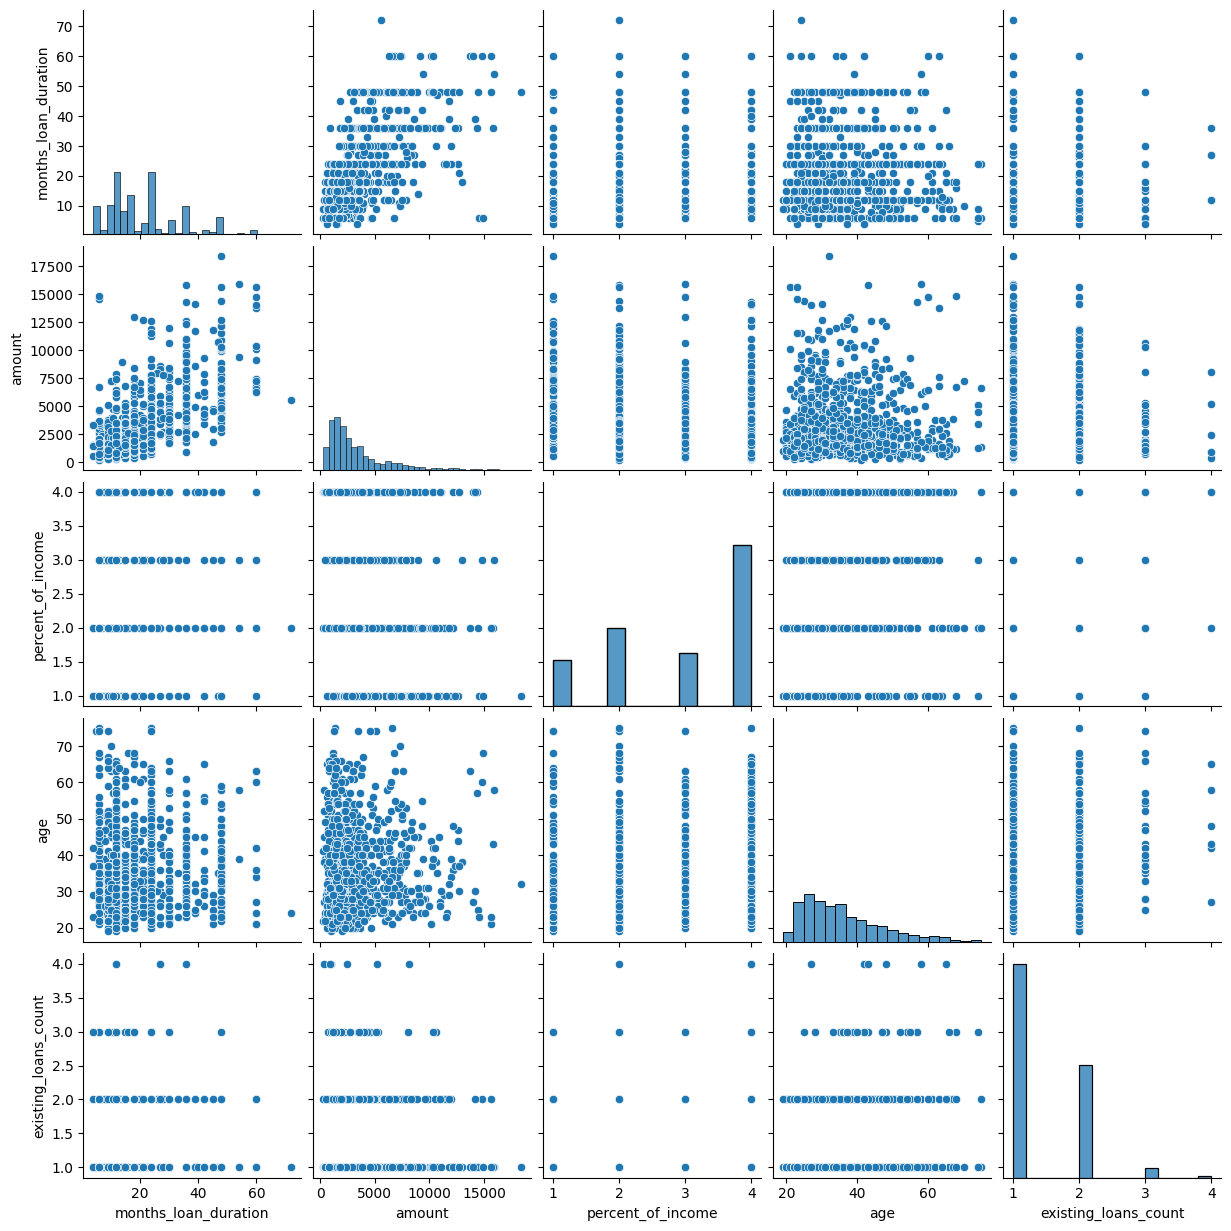

In [24]:
# Exploratory Data Analysis, Bivariate analysis and Multivariate analysis
# Perform EDA using libraries like matplotlib, seaborn
sns.pairplot(data)
plt.show()

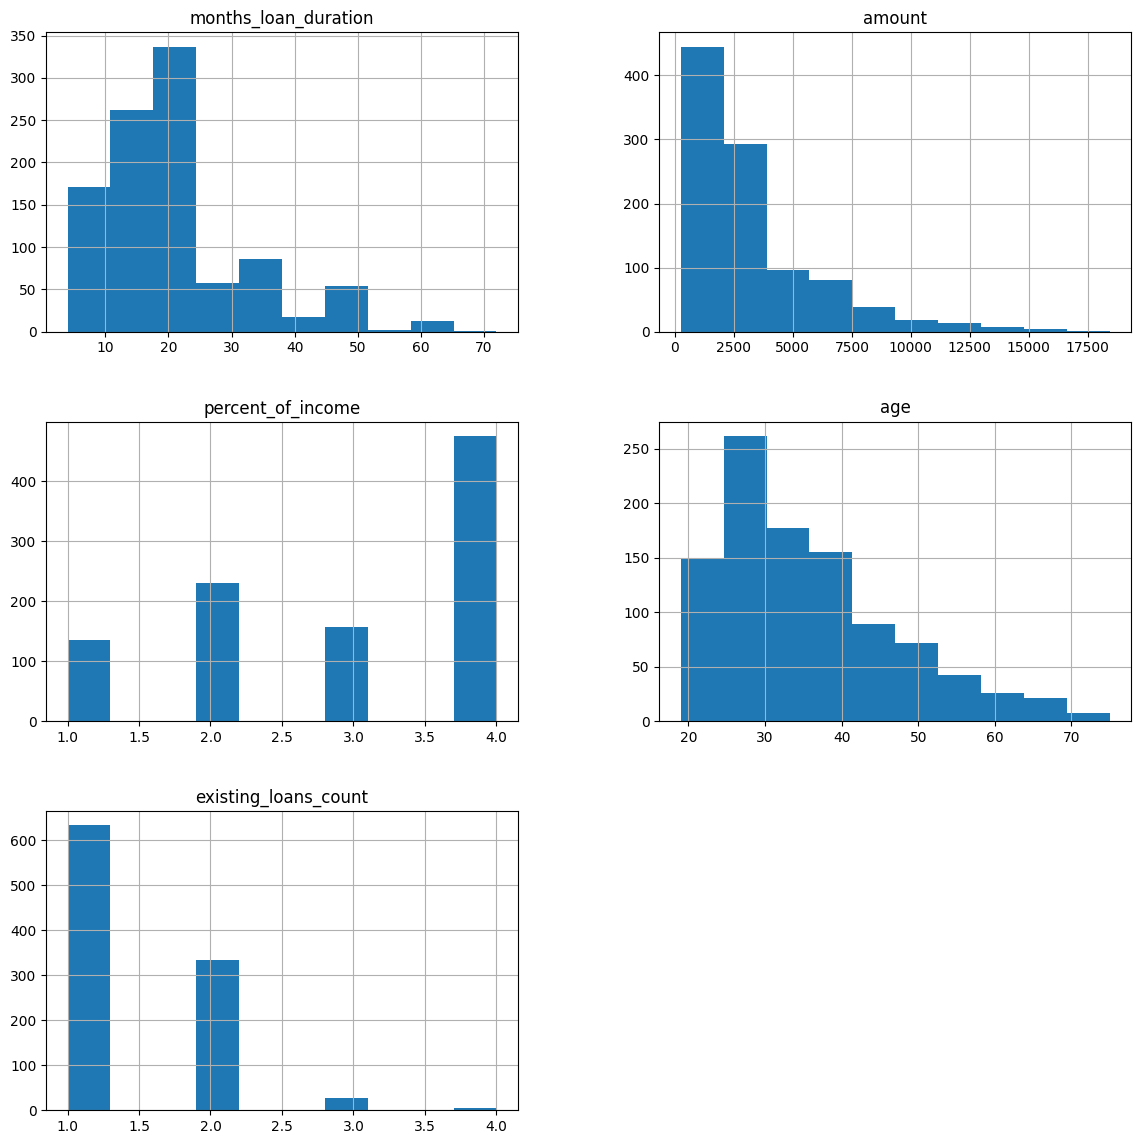

In [25]:
# creating histograms
data[numerical_cols].hist(figsize=(14, 14))
plt.show()

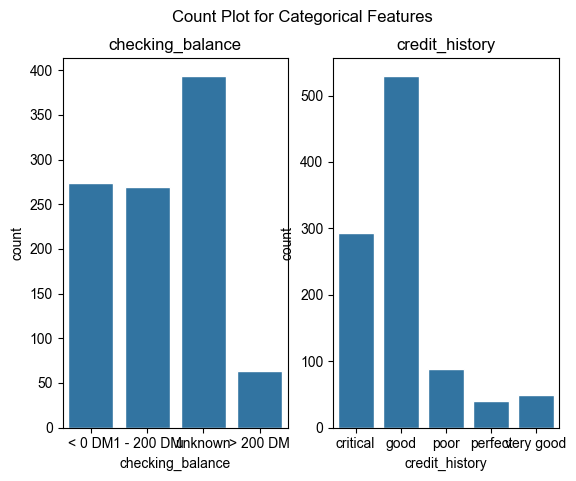

In [26]:
fig, axes = plt.subplots(1, 2)
fig.suptitle("Count Plot for Categorical Features")
sns.set(rc={"figure.figsize": (10, 5)})

sns.countplot(ax=axes[0], x=categorical_cols[0], data=data)
axes[0].set_title(categorical_cols[0])

sns.countplot(ax=axes[1], x=categorical_cols[1], data=data)
axes[1].set_title(categorical_cols[1])

plt.show()

In [27]:
# Identify categorical columns (assuming 'data.dtypes' outputs the types of each column)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Convert categorical columns using pd.get_dummies
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Compute the correlation matrix on the encoded dataset
correlation_matrix = data_encoded.corr()


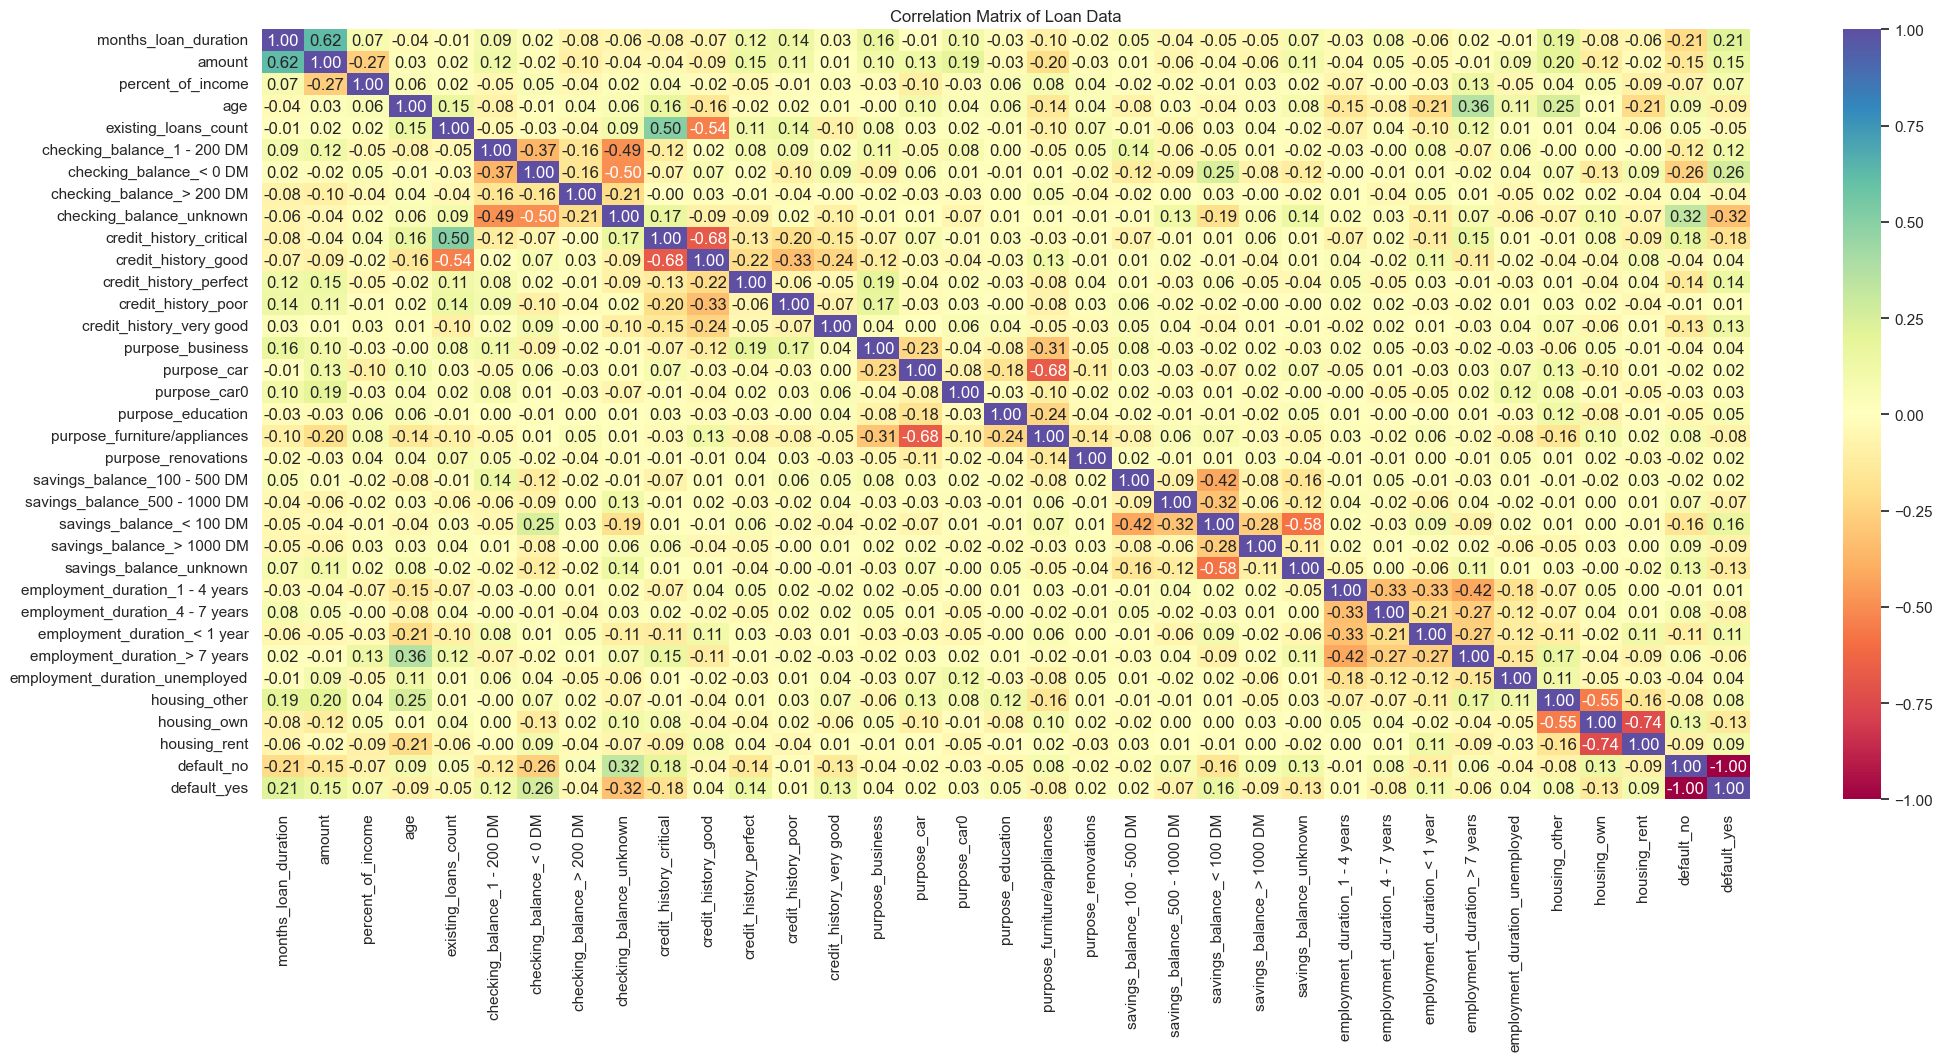

In [28]:
plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Correlation Matrix of Loan Data")
plt.show()

In [29]:
# Mean of numerical variables grouped by attrition
data.groupby(["default"])[numerical_cols].mean()

,months_loan_duration,amount,percent_of_income,age,existing_loans_count
default,,,,,
no,19.207,2985.457,2.920,36.224,1.424
yes,24.860,3938.127,3.097,33.963,1.367


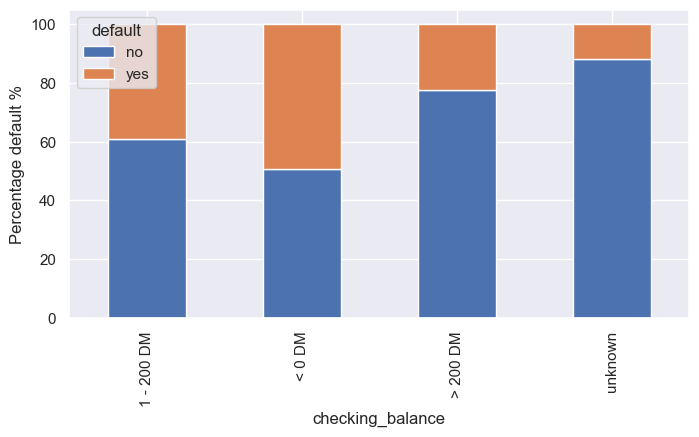

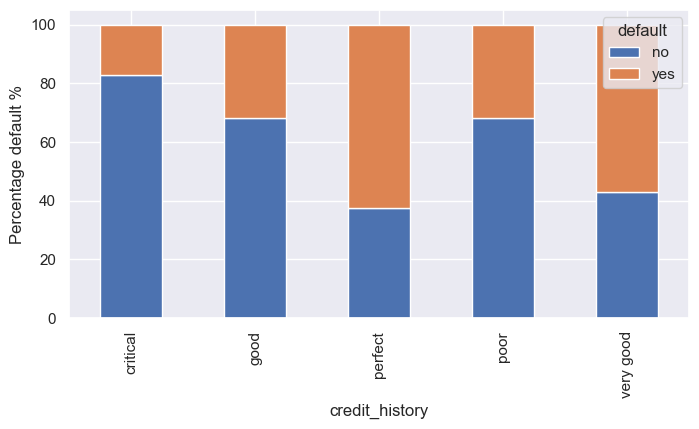

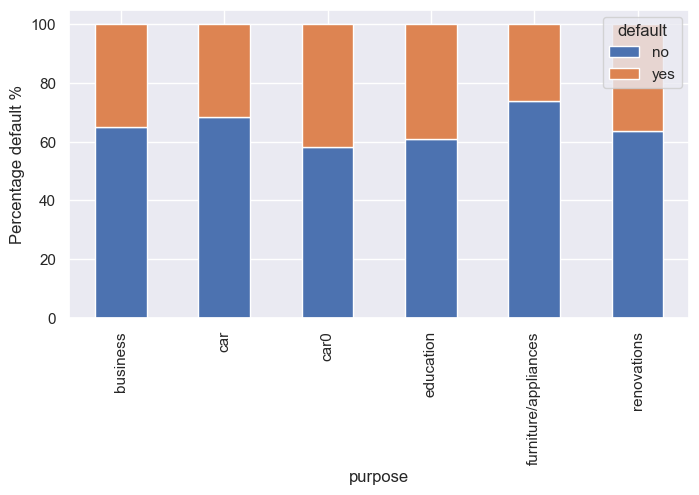

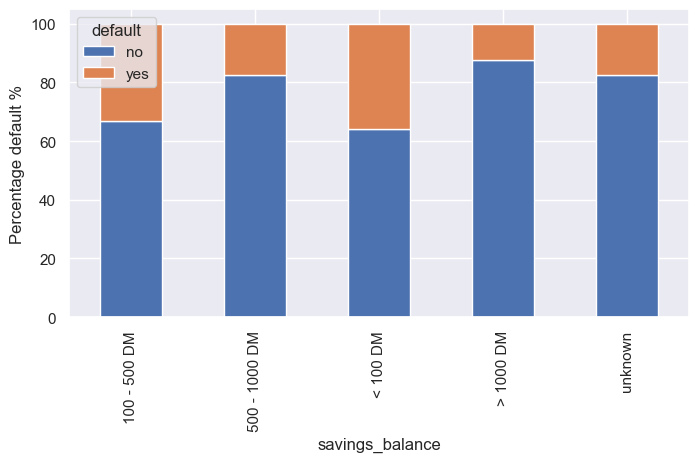

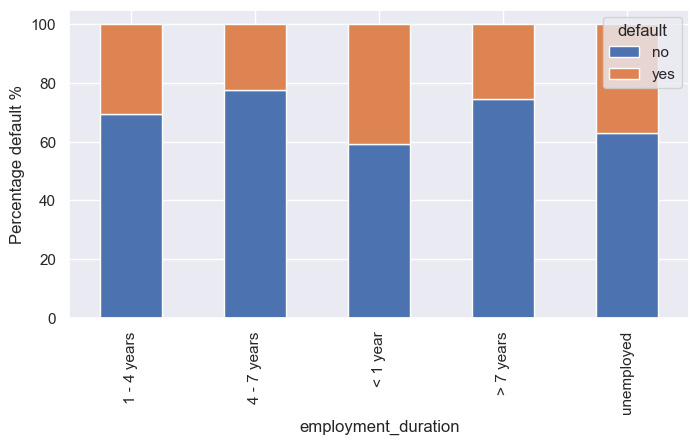

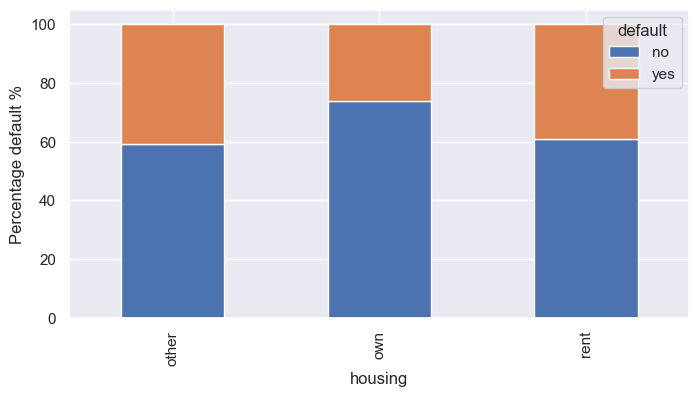

In [30]:
for i in categorical_cols:
    if i != "default":
        (pd.crosstab(data[i], data["default"], normalize="index") * 100).plot(
            kind="bar", figsize=(8, 4), stacked=True
        )
        plt.ylabel("Percentage default %")

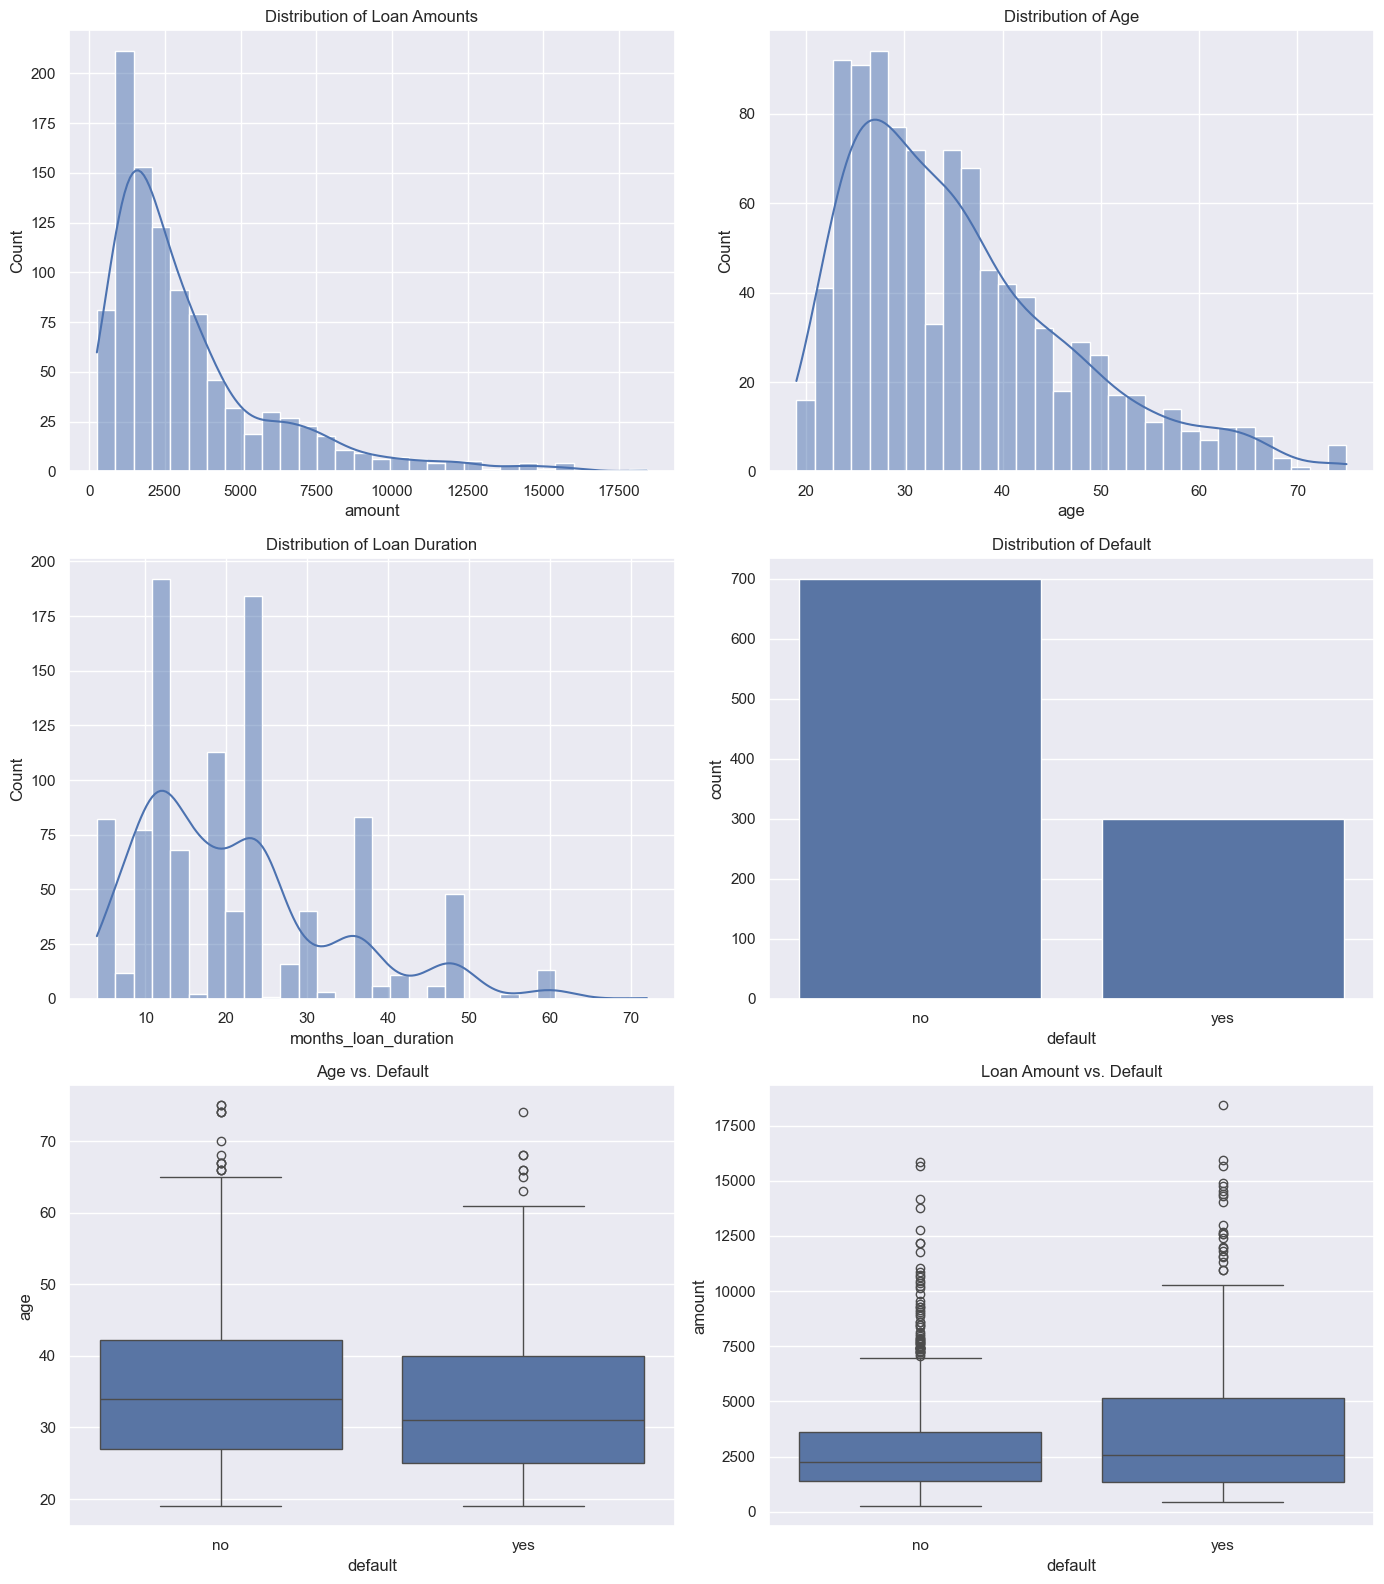

In [31]:
# Visualizations
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
sns.histplot(data=data, x='amount', bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Loan Amounts')
sns.histplot(data=data, x='age', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Age')
sns.histplot(data=data, x='months_loan_duration', bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Loan Duration')
sns.countplot(data=data, x='default', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Default')
sns.boxplot(x='default', y='age', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Age vs. Default')
sns.boxplot(x='default', y='amount', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Loan Amount vs. Default')
plt.tight_layout()
plt.show()

In [32]:
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_test = imputer.transform(X_test)

In [33]:
# Polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [34]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 40.654761904761905
Random forest: 39.421768707483
GBM: 40.2295918367347
Adaboost: 43.9625850340136
Xgboost: 43.16326530612245

Training Performance:

Bagging: 95.0207468879668
Random forest: 100.0
GBM: 66.39004149377593
Adaboost: 53.11203319502075
Xgboost: 100.0


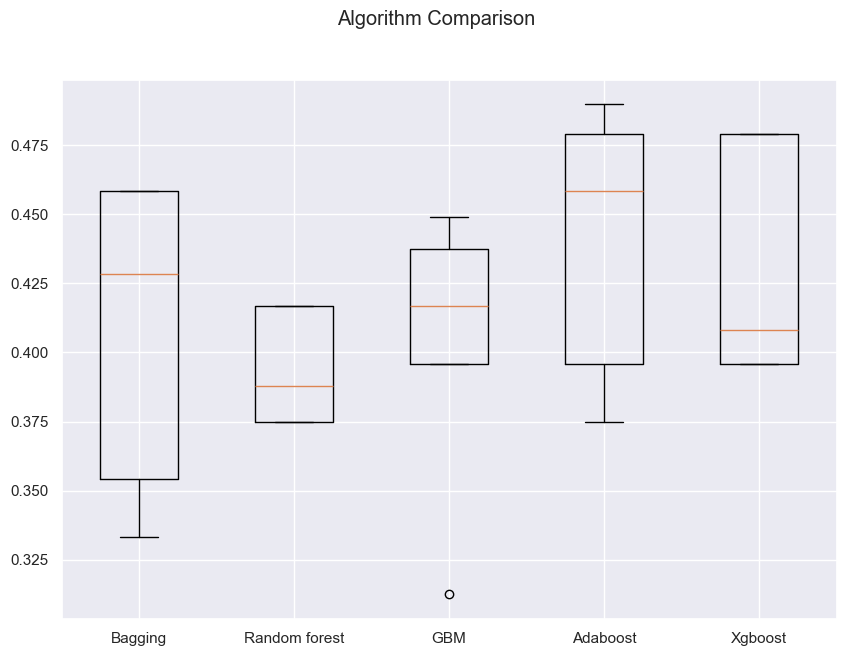

In [35]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [36]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [37]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [38]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
}

In [39]:
# Define a function to build pipelines for each model
def build_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

In [40]:
# Hyperparameters for GridSearchCV
param_grids = {
    'Logistic Regression': {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'classifier__max_depth': [None, 5, 10, 20],
                      'classifier__min_samples_split': [2, 5, 10]},
    'Random Forest': {'classifier__n_estimators': [50, 100, 200],
                      'classifier__max_depth': [None, 5, 10],
                      'classifier__min_samples_split': [2, 5, 10],
                      'classifier__min_samples_leaf': [1, 2, 4]},
    'AdaBoost': {'classifier__n_estimators': [50, 100, 200],
                 'classifier__learning_rate': [0.01, 0.1, 1]},
    'Gradient Boosting': {'classifier__n_estimators': [50, 100, 200],
                          'classifier__learning_rate': [0.01, 0.1, 1],
                          'classifier__max_depth': [3, 5, 7]},
    'Bagging': {'classifier__n_estimators': [10, 50, 100]},
    'XGBoost': {'classifier__n_estimators': [50, 100, 200],
                'classifier__learning_rate': [0.01, 0.1, 1]},
    'LightGBM': {'classifier__n_estimators': [50, 100, 200],
                 'classifier__learning_rate': [0.01, 0.1, 1]},
    'CatBoost': {'classifier__iterations': [50, 100, 200],
                 'classifier__learning_rate': [0.01, 0.1, 1]}
}

In [41]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)  
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  
    precision = precision_score(y_test, y_pred)  
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {'F1 Score': f1, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'ROC AUC Score': roc_auc,'Confusion Matrix': cm}

[LightGBM] [Info] Number of positive: 241, number of negative: 559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.301250 -> initscore=-0.841353
[LightGBM] [Info] Start training from score -0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [42]:
# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

Model: Logistic Regression
F1 Score: 0.5436893203883495
Accuracy: 0.765
Recall: 0.4745762711864407
Precision: 0.6363636363636364
ROC AUC Score: 0.6805505469407381
Confusion Matrix: [[125  16]
 [ 31  28]]


Model: Decision Tree
F1 Score: 0.4426229508196722
Accuracy: 0.66
Recall: 0.4576271186440678
Precision: 0.42857142857142855
ROC AUC Score: 0.6011539848539489
Confusion Matrix: [[105  36]
 [ 32  27]]


Model: Random Forest
F1 Score: 0.5454545454545455
Accuracy: 0.775
Recall: 0.4576271186440678
Precision: 0.675
ROC AUC Score: 0.6827142685418921
Confusion Matrix: [[128  13]
 [ 32  27]]


Model: AdaBoost
F1 Score: 0.505050505050505
Accuracy: 0.755
Recall: 0.423728813559322
Precision: 0.625
ROC AUC Score: 0.6586729174179589
Confusion Matrix: [[126  15]
 [ 34  25]]


Model: Gradient Boosting
F1 Score: 0.5934065934065933
Accuracy: 0.815
Recall: 0.4576271186440678
Precision: 0.84375
ROC AUC Score: 0.7110830628681332
Confusion Matrix: [[136   5]
 [ 32  27]]


Model: Bagging
F1 Score: 0.5217391

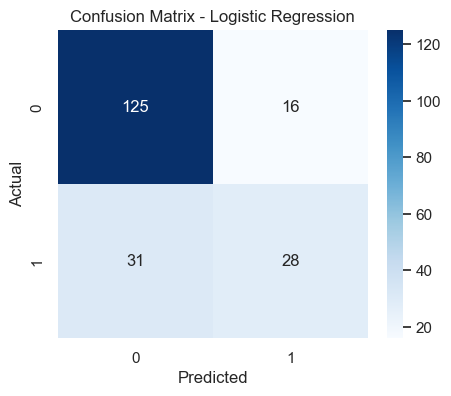

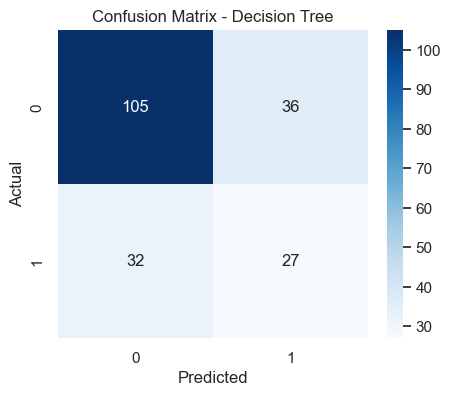

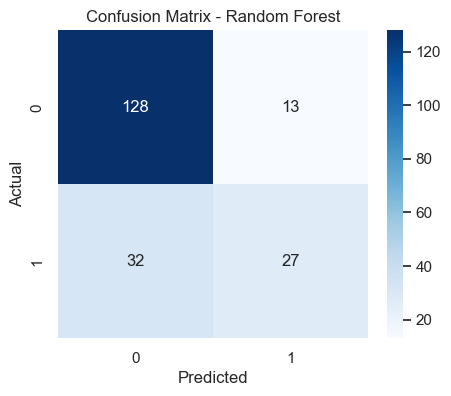

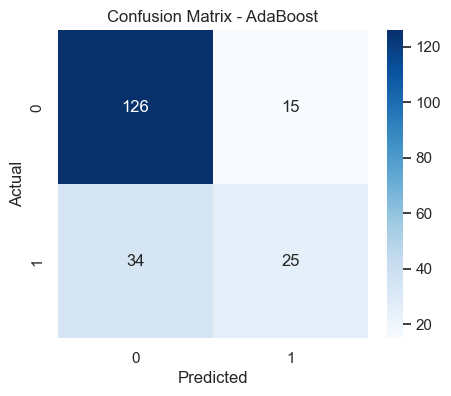

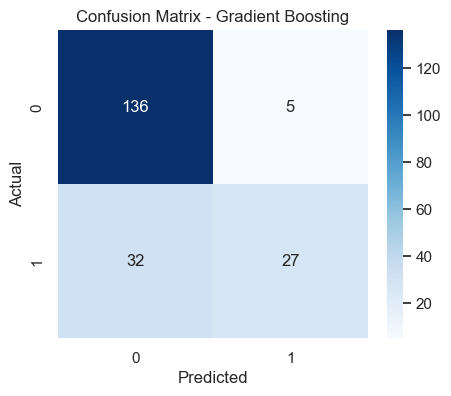

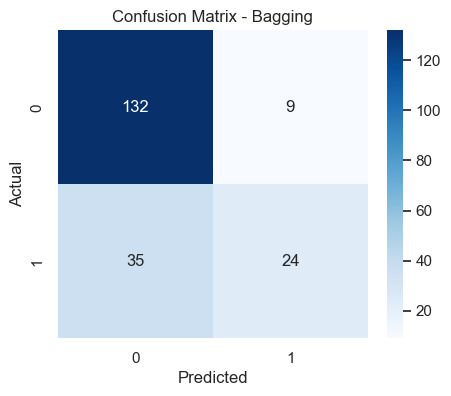

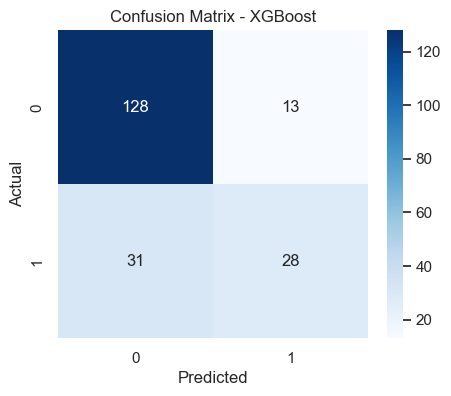

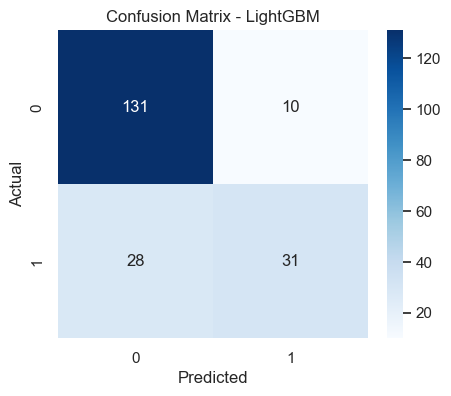

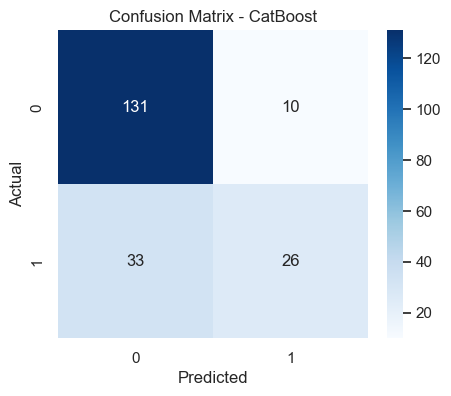

In [43]:
# Confusion Matrix for each model
for name, metrics in results.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

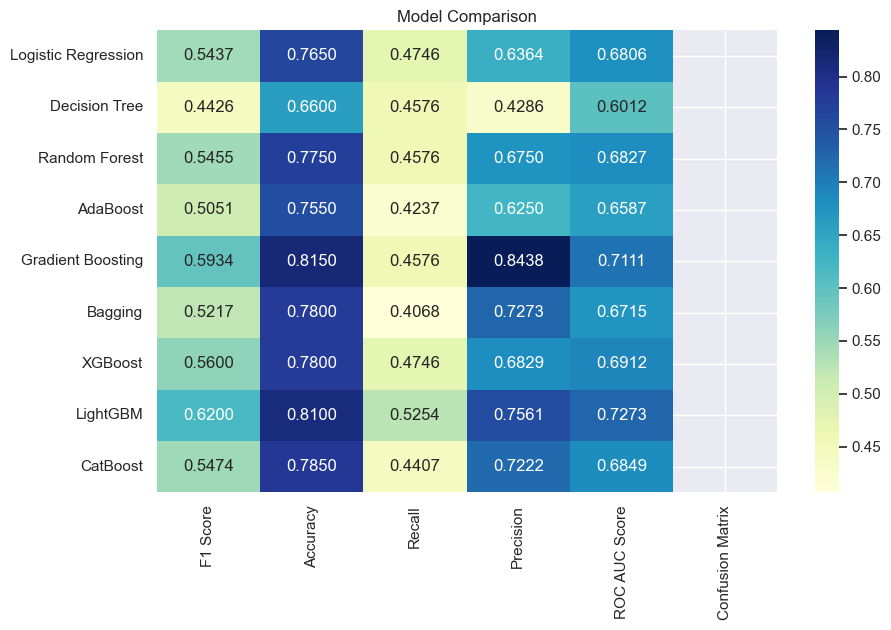

In [44]:
# Generate heatmap for model comparison
df_results = pd.DataFrame.from_dict(results, orient='index')
# Exclude non-numeric columns from conversion and fill non-numeric values with NaN
df_results_numeric = df_results.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(10, 6))
sns.heatmap(df_results_numeric, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title("Model Comparison")
plt.show()